<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/5_Logistic_Regression_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-  1.1. Logistic Function (aka, Sigmoid Function) :  
$$P(y=1|X) = \frac{1}{1+e^{-z}}$$


$$\text where $$

$$ z = \beta_0 + \beta_1X$$

## 2 Import Dataset, titanic

In [2]:
# prompt: get titanic dataset from sns
data=pd.read_csv("https://raw.githubusercontent.com/kjmobile/data/main/ml/titanic.csv")

In [3]:
data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1


## 3 Checking titanic

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [5]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


<Axes: >

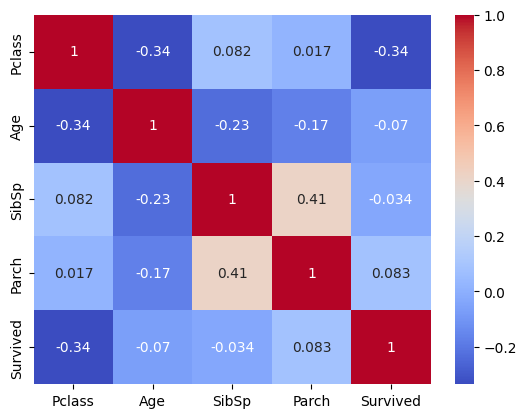

In [6]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=True)

## 4 Preprocessing: Converting Categorical Variables (Dummy Variables and One-Hot Encoding)

In [7]:
data.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1


In [8]:
titanic = data.drop(['Name','Ticket'], axis=1)
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [9]:
# We use dummy coding (instead of one hot encoding this time by setting drop_first=True)
titanic_dum=pd.get_dummies(titanic, columns = ['Sex','Embarked'], drop_first=True)


In [10]:
titanic_dum

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


## 5 Modeling and Predicting

In [11]:
from sklearn.model_selection import train_test_split

X = titanic_dum.drop('Survived', axis = 1)
y = titanic_dum['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
776,3,5.0,0,0,False,False,True
781,1,29.0,0,0,True,False,True


In [15]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Predict category
pred = lr.predict(X_test)

In [ ]:
# to obtain actual probablities
lr.predict_proba(X_test)

## 6 Evaluating Prediction Models

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

In [29]:
lr.coef_

array([[-1.18186729, -0.0399038 , -0.32076816,  0.00805085, -2.56836801,
        -0.07487875, -0.23730722]])

In [19]:
pd.Series(lr.coef_[0], index = X.columns)

Pclass       -1.181867
Age          -0.039904
SibSp        -0.320768
Parch         0.008051
Sex_male     -2.568368
Embarked_Q   -0.074879
Embarked_S   -0.237307
dtype: float64

## 7 Apply some Feature Engineering

In [30]:
titanic_dum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Survived', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [31]:
titanic_dum['family'] = titanic_dum['SibSp'] + titanic_dum['Parch'] # sibling & spouse + Parent & child

In [32]:
titanic_dum.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,1,0,0,True,False,True,1
1,1,38.0,1,0,1,False,False,False,1
2,3,26.0,0,0,1,False,False,True,0
3,1,35.0,1,0,1,False,False,True,1
4,3,35.0,0,0,0,True,False,True,0


In [33]:
# Dose the prediction accuracy improved by 'engineering' "family variable?"
X = titanic_dum.drop(['Survived','SibSp','Parch'], axis = 1)
y = titanic_dum['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

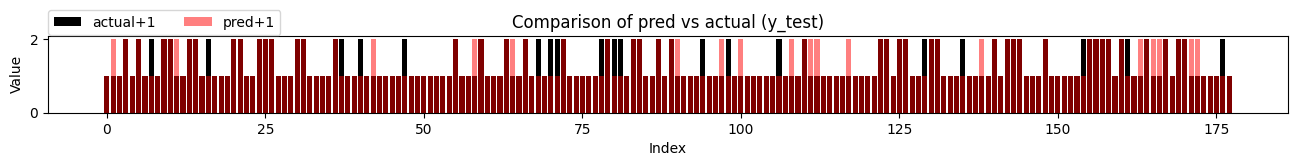

In [34]:
# visualize the predicted performance: pink (false positive) and black (fasle nagative) bars represents incorrect prediction

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 1))

plt.bar(range(len(y_test)), y_test+1, label='actual+1', color='black')
plt.bar(range(len(pred)), (pred+1), label='pred+1', color='red', alpha=0.5)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of pred vs actual (y_test)')
plt.legend(ncol=3, loc=(0,1.01))
plt.show()
